In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# PyTorch Guide | Basics 🚀

## 1. Installation & Basic Check ✅

In [114]:
!pip install torch torchvision torchaudio

In [115]:
import torch
print(torch.__version__)

2.5.1+cu121


In [4]:
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore', 'FutureWarning')
plt.style.use('seaborn-v0_8-pastel')

## 2. Tensors in PyTorch 🔢

In [5]:
vec = np.array((1, 2, 3))
vec

array([1, 2, 3])

In [6]:
torch_tensor = torch.from_numpy(vec)
torch_tensor

tensor([1, 2, 3])

In [7]:
print(f'torch_tensor.shape = {torch_tensor.shape}')
print(f'torch_tensor.size() = {torch_tensor.size()}')

torch_tensor.shape = torch.Size([3])
torch_tensor.size() = torch.Size([3])


In [8]:
torch_tensor -= torch_tensor 
torch_tensor

tensor([0, 0, 0])

In [9]:
vec

array([0, 0, 0])

### Random picture

In [10]:
torch.rand(3, 224, 224)

tensor([[[3.2020e-01, 7.8567e-01, 5.0809e-01,  ..., 3.2338e-01,
          8.3581e-01, 3.2565e-01],
         [2.6547e-01, 5.2417e-01, 1.2020e-01,  ..., 3.4906e-01,
          7.2534e-01, 1.1821e-01],
         [9.3340e-02, 6.4385e-01, 7.0326e-01,  ..., 6.1244e-01,
          3.3064e-01, 3.2632e-01],
         ...,
         [3.9150e-01, 8.7028e-02, 6.5365e-01,  ..., 9.6469e-01,
          4.2575e-01, 7.4539e-01],
         [5.9720e-01, 7.9624e-01, 6.7669e-02,  ..., 6.1570e-01,
          7.8411e-01, 5.6888e-01],
         [4.5214e-01, 7.9968e-01, 9.7181e-01,  ..., 1.6865e-01,
          7.1641e-01, 1.9620e-01]],

        [[1.4325e-01, 8.0331e-01, 3.9866e-01,  ..., 4.4234e-01,
          9.5230e-01, 7.9894e-01],
         [7.9033e-01, 5.9445e-01, 4.8381e-01,  ..., 4.4922e-01,
          1.2441e-01, 6.0644e-01],
         [4.7123e-02, 4.7295e-01, 1.4517e-02,  ..., 8.3464e-01,
          7.9554e-01, 3.1603e-01],
         ...,
         [9.0515e-01, 5.8266e-01, 5.0300e-01,  ..., 3.8391e-01,
          2.901

In [11]:
print(
    torch.FloatTensor().dtype, \
    torch.HalfTensor().dtype, \
    torch.DoubleTensor().dtype, \
    sep='\n'
)

torch.float32
torch.float16
torch.float64


In [12]:
print(
    torch.IntTensor().dtype, \
    torch.ShortTensor().dtype, \
    torch.LongTensor().dtype, \
    sep='\n'
)

torch.int32
torch.int16
torch.int64


In [13]:
torch.rand(3, 224, 224).dtype

torch.float32

In [14]:
(torch.rand(3, 224, 224).type_as(torch.HalfTensor())).dtype

torch.float16

In [15]:
torch.FloatTensor(42)

tensor([-3.8357e-13,  4.4718e-41, -3.8357e-13,  4.4718e-41,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  8.2907e-33,
         1.8788e+31,  1.7220e+22,  2.1715e-18,  2.6845e+23,  1.3722e-05,
         2.6728e+23,  8.2724e-10,  5.3241e+22,  2.7180e-06,  1.3459e+22,
         1.3423e-05,  2.6102e-09,  6.4099e-10,  2.1707e-18,  1.6678e+19,
         7.0976e+22,  2.1715e-18,  4.2330e+21,  1.6534e+19,  1.1625e+27,
         1.4580e-19,  7.1856e+22,  4.3605e+27,  1.5766e-19,  7.1856e+22,
         4.3605e+27,  1.4580e-19,  1.8179e+31,  1.8524e+28,  2.1715e-18,
         2.6845e+23,  1.3722e-05])

In [16]:
torch.ones(2, 2) @ torch.zeros(2, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

### Normal Distribution Tensor

In [17]:
X = torch.randn((4, 2, 3))
X

tensor([[[-0.6583, -0.8045,  0.4814],
         [-0.9858,  1.6764,  0.6022]],

        [[ 0.0313, -0.2440,  0.2952],
         [ 0.0630, -0.1351, -0.6149]],

        [[ 1.0030,  1.3970, -0.3330],
         [ 0.8725, -1.5546, -0.1381]],

        [[-0.2726,  0.6010,  0.6440],
         [-0.2696,  0.6864,  0.5425]]])

In [18]:
X.uniform_(1, 2) # ! inplace func with _

tensor([[[1.7632, 1.6916, 1.4823],
         [1.8471, 1.5406, 1.5424]],

        [[1.5736, 1.8486, 1.9524],
         [1.3005, 1.7313, 1.6255]],

        [[1.5349, 1.8165, 1.1888],
         [1.3485, 1.0400, 1.7172]],

        [[1.4799, 1.2853, 1.3488],
         [1.6520, 1.5799, 1.4969]]])

In [19]:
X.bernoulli_(p=.7) 

tensor([[[1., 0., 1.],
         [1., 0., 0.]],

        [[1., 0., 1.],
         [1., 0., 1.]],

        [[1., 1., 1.],
         [0., 1., 0.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])

In [20]:
X.normal_(mean=0, std=1)

tensor([[[ 0.5121, -0.1721, -0.9359],
         [-1.0730, -1.2996, -0.1700]],

        [[ 1.2032, -0.7497,  0.0358],
         [-1.0377, -1.0209,  0.7280]],

        [[-0.3167, -1.3473, -0.1134],
         [ 0.2892,  0.8664,  1.4729]],

        [[ 1.1499, -0.3748, -2.3000],
         [-1.2923,  0.3700,  1.3453]]])

In [21]:
X = torch.ones((2, 3)) * 2
Y = torch.ones((2, 3)) * -3

In [22]:
X+Y

tensor([[-1., -1., -1.],
        [-1., -1., -1.]])

In [23]:
X.add(Y) # ! can be inplace with _

tensor([[-1., -1., -1.],
        [-1., -1., -1.]])

In [24]:
X-Y

tensor([[5., 5., 5.],
        [5., 5., 5.]])

In [25]:
X.sub(Y)

tensor([[5., 5., 5.],
        [5., 5., 5.]])

In [26]:
X*Y

tensor([[-6., -6., -6.],
        [-6., -6., -6.]])

In [27]:
X.mul(Y)

tensor([[-6., -6., -6.],
        [-6., -6., -6.]])

In [28]:
X/Y

tensor([[-0.6667, -0.6667, -0.6667],
        [-0.6667, -0.6667, -0.6667]])

In [29]:
X.div(Y)

tensor([[-0.6667, -0.6667, -0.6667],
        [-0.6667, -0.6667, -0.6667]])

In [30]:
X > Y

tensor([[True, True, True],
        [True, True, True]])

In [31]:
X == Y

tensor([[False, False, False],
        [False, False, False]])

In [32]:
Y.abs()

tensor([[3., 3., 3.],
        [3., 3., 3.]])

In [33]:
X = torch.FloatTensor([[1, 2, 3], [3, 2, 8]])
Y = torch.FloatTensor([[3, 4, 6], [7, 8, 9]])

X @ Y.t()

tensor([[ 29.,  50.],
        [ 65., 109.]])

In [34]:
X.mm(Y.t())

tensor([[ 29.,  50.],
        [ 65., 109.]])

### Agregation [Torch analog from numpy](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users)

In [35]:
X.sum()

tensor(19.)

In [36]:
X.sum(0)

tensor([ 4.,  4., 11.])

In [37]:
X.sum(1)

tensor([ 6., 13.])

In [38]:
X.mean()

tensor(3.1667)

In [39]:
X.max(1)

torch.return_types.max(
values=tensor([3., 8.]),
indices=tensor([2, 2]))

In [40]:
X.max(0).values

tensor([3., 2., 8.])

## 3. Autograd (Automatic Differentiation) 🔄

### Basic Example 📌

In [119]:
x = torch.tensor(2.0, requires_grad=True)
y = x ** 3  # y = x^3
y.backward()  # Compute derivative
torch.grad = x.grad  # dy/dx = 3x^2
print(x.grad)  # Output: 12.0 (when x = 2)

tensor(12.)


### More Examples with Gradients 📊

In [120]:
a = torch.tensor([2.0, 3.0], requires_grad=True)
b = a ** 2 + 3 * a  # Function of 'a'
b.sum().backward()  # Compute gradients
print(a.grad)  # Gradients of each element in 'a'

tensor([7., 9.])


### Gradient Tracking and Stopping ⚠️

In [121]:
x = torch.tensor(4.0, requires_grad=True)
with torch.no_grad():  # Temporarily disable autograd
    y = x * 3
print(y.requires_grad)  

False


## 4. CUDA (Using GPU) ⚡

[Nvidia docs](https://docs.nvidia.com/cuda/) 

[WikiPedia](https://en.wikipedia.org/wiki/CUDA)

In [41]:
!nvidia-smi

Fri Feb 21 18:10:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [42]:
X = torch.FloatTensor(4200, 10000, 5).normal_()
X

tensor([[[ 0.8224, -0.8003,  1.5597,  1.2052,  0.5621],
         [-0.1146, -0.9556,  1.4155,  1.1030, -1.2169],
         [-2.5424, -0.5029,  1.0950, -0.4178, -0.9345],
         ...,
         [-0.0100, -0.8852, -1.3846,  0.7022,  0.1358],
         [ 1.0054, -0.0832, -0.0818,  0.4979, -1.4493],
         [ 0.6732,  0.8964,  0.4091, -0.1705, -1.1298]],

        [[ 0.3928, -2.2599,  0.9669, -0.7110,  0.1952],
         [ 0.6219, -0.4008, -1.0239, -0.9341,  0.6314],
         [ 0.9070,  0.3331,  0.4016,  1.6663,  0.8365],
         ...,
         [-2.0751,  1.4213,  0.7114,  0.8699,  0.7245],
         [ 0.1492, -0.8031, -1.3097, -0.8346,  0.2168],
         [ 0.7012, -0.2556,  0.0647, -0.6550,  1.0482]],

        [[-2.2506, -0.7008, -0.7667, -0.2939, -0.3927],
         [ 0.6839,  2.3022, -0.7785, -1.0353,  1.4692],
         [ 2.3662,  0.5324, -0.2593,  0.6840, -1.7345],
         ...,
         [-0.6578,  0.5614,  0.0538,  0.1359, -0.5522],
         [ 1.2260,  1.6635, -0.3666,  0.2037, -0.5603],
  

In [43]:
X.is_cuda

False

In [44]:
X = X.to('cuda')
X.is_cuda

True

In [45]:
!nvidia-smi

Fri Feb 21 18:11:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P0             27W /   70W |     905MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [47]:
torch.cuda.empty_cache()

In [56]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
DEVICE

'cuda'

In [57]:
X = torch.FloatTensor(4200, 10000, 5).normal_()
Y = torch.FloatTensor(4200, 10000, 5).normal_()

In [58]:
%%timeit

X*Y

454 ms ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [59]:
X = X.to(DEVICE)
Y = Y.to(DEVICE)

In [60]:
%%timeit

X*Y

10.2 ms ± 46.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 5. Creating a Simple Linear Model 🤖

In [62]:
!pip install torchmetrics

In [110]:
import torch.nn as nn
from torch import functional as F
from torch.utils.data import TensorDataset, DataLoader
from torchmetrics import Accuracy
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from collections import Counter
from tqdm.autonotebook import tqdm

In [78]:
X, y = make_moons(n_samples=5000, random_state=42, noise=0.15)
Counter(y)

Counter({0: 2500, 1: 2500})

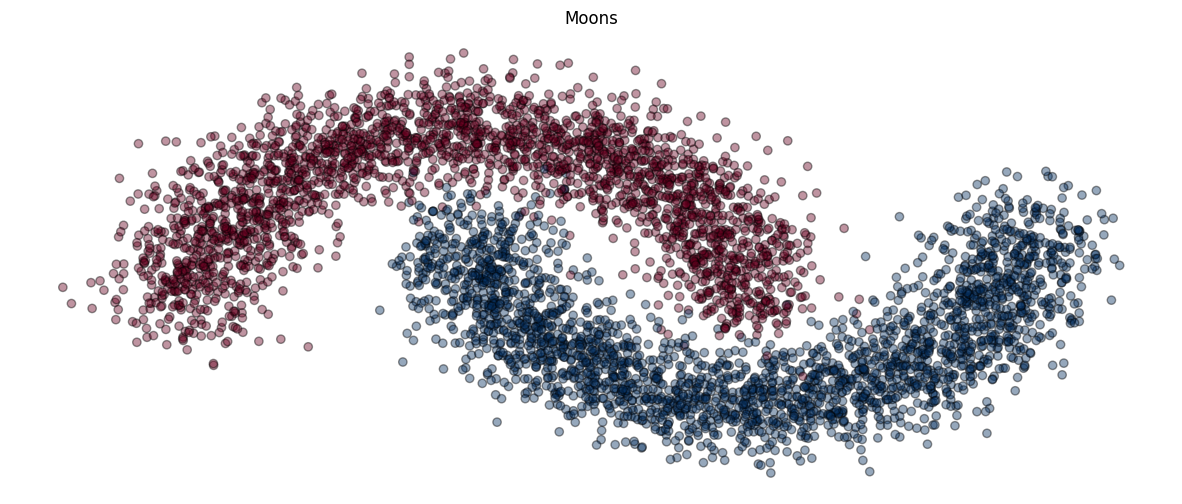

In [79]:
plt.figure(figsize=(15, 6))
plt.title('Moons')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', alpha=.42, ec='black')
plt.axis('off');

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [81]:
X_train = torch.from_numpy(X_train).to(torch.float32)
X_test = torch.from_numpy(X_test).to(torch.float32)
y_train = torch.from_numpy(y_train).to(torch.float32)
y_test = torch.from_numpy(y_test).to(torch.float32)

In [82]:
BATCH = 64

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=BATCH)
test_loader = DataLoader(test_dataset, batch_size=BATCH)

In [84]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
DEVICE

'cuda'

### Linear Model in Pytorch

In [87]:
class LinearModel(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.W = nn.Parameter(torch.randn((in_features, out_features), requires_grad=True))
        self.bias = nn.Parameter(torch.ones(out_features, requires_grad=True))

    def forward(self, X):
        X = X @ self.W
        X += self.bias
        return X

In [96]:
model = LinearModel(2, 1)
loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=.01)

model = model.to(DEVICE)
accuracy = Accuracy(task='binary').to(DEVICE)

losses_train = []
total_loss = []
accuracy_test = []

MAX_EPOCH = 100

for epoch in tqdm(range(MAX_EPOCH)):
    for iteration, (X_batch, y_batch) in enumerate(train_loader):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_batch.to(DEVICE))
        outputs = outputs.view(-1)
        loss = loss_function(outputs, y_batch.to(DEVICE))
        loss.backward()
        losses_train.append(loss.detach().cpu().numpy().item())
        optimizer.step()
        
    total_loss.append(np.mean(losses_train))
    for iteration, (X_batch, y_batch) in enumerate(test_loader):
        model.eval()
        with torch.no_grad():
            outputs = model(X_batch.to(DEVICE))
            outputs = outputs.view(-1)
            loss = loss_function(outputs, y_batch.to(DEVICE))
            proba = torch.sigmoid(outputs)
            batch_acc =accuracy(proba, y_batch.to(torch.int32).to(DEVICE))
            accuracy_test.append(batch_acc.detach().cpu().numpy().item())

  0%|          | 0/100 [00:00<?, ?it/s]

In [98]:
acc = np.mean(accuracy_test)
print(f"Accuracy {acc:.2%}")

Accuracy 83.33%


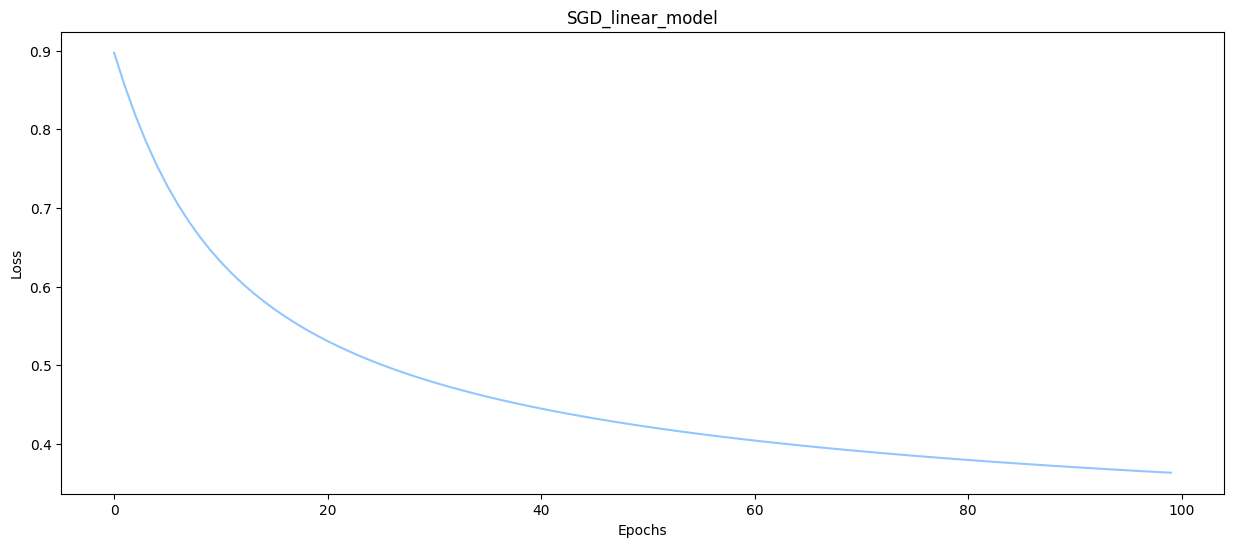

In [99]:
plt.figure(figsize=(15, 6))
plt.plot(range(len(total_loss)), total_loss, linestyle="-")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SGD_linear_model")
plt.show()

In [101]:
# https://stackoverflow.com/questions/39719308/keras-model-creates-linear-classification-for-make-moons-data
def plot_decision_boundary(model: nn.Module) -> None:
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.1
 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    model.eval() 
    with torch.no_grad(): 
      data = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).type(torch.float32)
      probs = torch.sigmoid(model(data).reshape(xx.shape))
      probs = probs.numpy().reshape(xx.shape)

    plt.figure(figsize=(15, 6))
    plt.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
    plt.scatter(X[100:, 0], X[100:, 1], 
                c=y[100:], 
                cmap="RdBu", 
                s=50, 
                linewidth=1,
                alpha=.42, 
                ec="black")
    plt.title("Decision Boundary")
    plt.axis("off")
    plt.show()

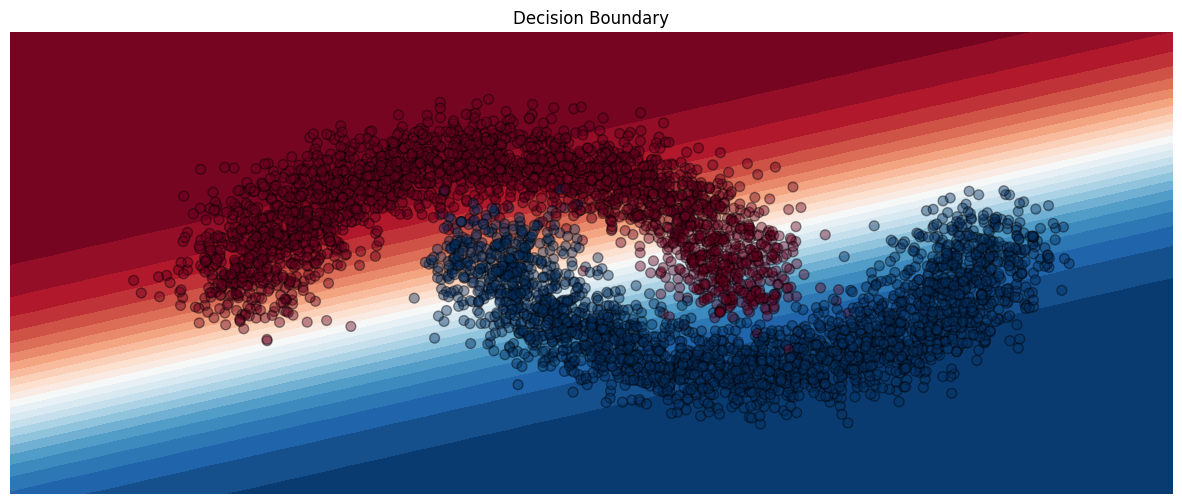

In [102]:
plot_decision_boundary(model.to("cpu"))

In [104]:
with torch.no_grad():
  torch.cuda.empty_cache()